<a href="https://colab.research.google.com/github/nihar6697/Task7/blob/main/Task7_6_Random_Forest_Assignment16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt

**Importing the dataset**

In [2]:
df = pd.read_csv("/content/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df['Gender']= df.Gender.map({'Male': 0,'Female': 1})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [6]:
df.drop(columns="User ID").head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [7]:
df.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [8]:
df = df.drop_duplicates()

**Splitting the dataset into the Training set and Test set**

In [9]:
# # # # # Labels are the values we want to predict
original_labels = np.array(df['Purchased']) # target varaibles

# # # Remove the labels from the features
original_features= df.drop('Purchased', axis = 1) #original features

# # # Saving feature names for later use
original_feature_list = list(original_features.columns) #orginal feature labels

In [10]:
X = df[['Gender','Age','EstimatedSalary']].values # fts
y = df['Purchased'].values # target
X_train,X_test,y_train,y_test = train_test_split(original_features,original_labels,test_size=0.20,random_state=0) # train- test split

**Feature Scaling**

In [11]:
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

**Fitting Random Forest to the Training set**

In [12]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve

# Instantiate model 
rf = RandomForestClassifier(n_estimators= 100, max_depth = 2, max_features='sqrt')  #n_estimator is hyperparameter(generally taken as 100)

# Train the model on training data
rf.fit(X_train_scaled, y_train);

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test_scaled)

Test set accuracy: 0.95
Test set auc: 0.95
Train set AUC :  0.9125586610739649


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


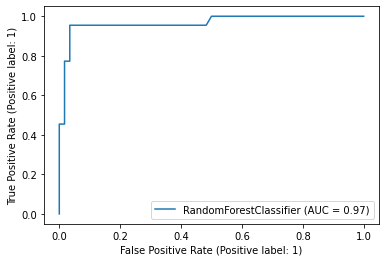

In [13]:
# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(rf, X_test_scaled, y_test)


acc = roc_auc_score(y_train, rf.predict(X_train_scaled))
print("Train set AUC : ", acc)

**Predicting the Test set results**

In [14]:
y_pred=rf.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

**Making the Confusion Matrix**

In [15]:
confusion_matrix(y_test,y_pred)

array([[55,  3],
       [ 1, 21]])

**Visualising the Training set results**

In [16]:
from sklearn import tree

In [17]:
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[4]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = original_feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png');

In [18]:
from sklearn.tree import export_graphviz
import pydot
from sklearn import tree

In [20]:
original_feature=df.drop(columns="Purchased")
original_feature_list=list(original_feature.columns)

In [21]:
feature_names=np.array(X_train_scaled).astype('str')
target_names=np.array(y).astype('str')
feature_names_test=np.array(X_test_scaled)

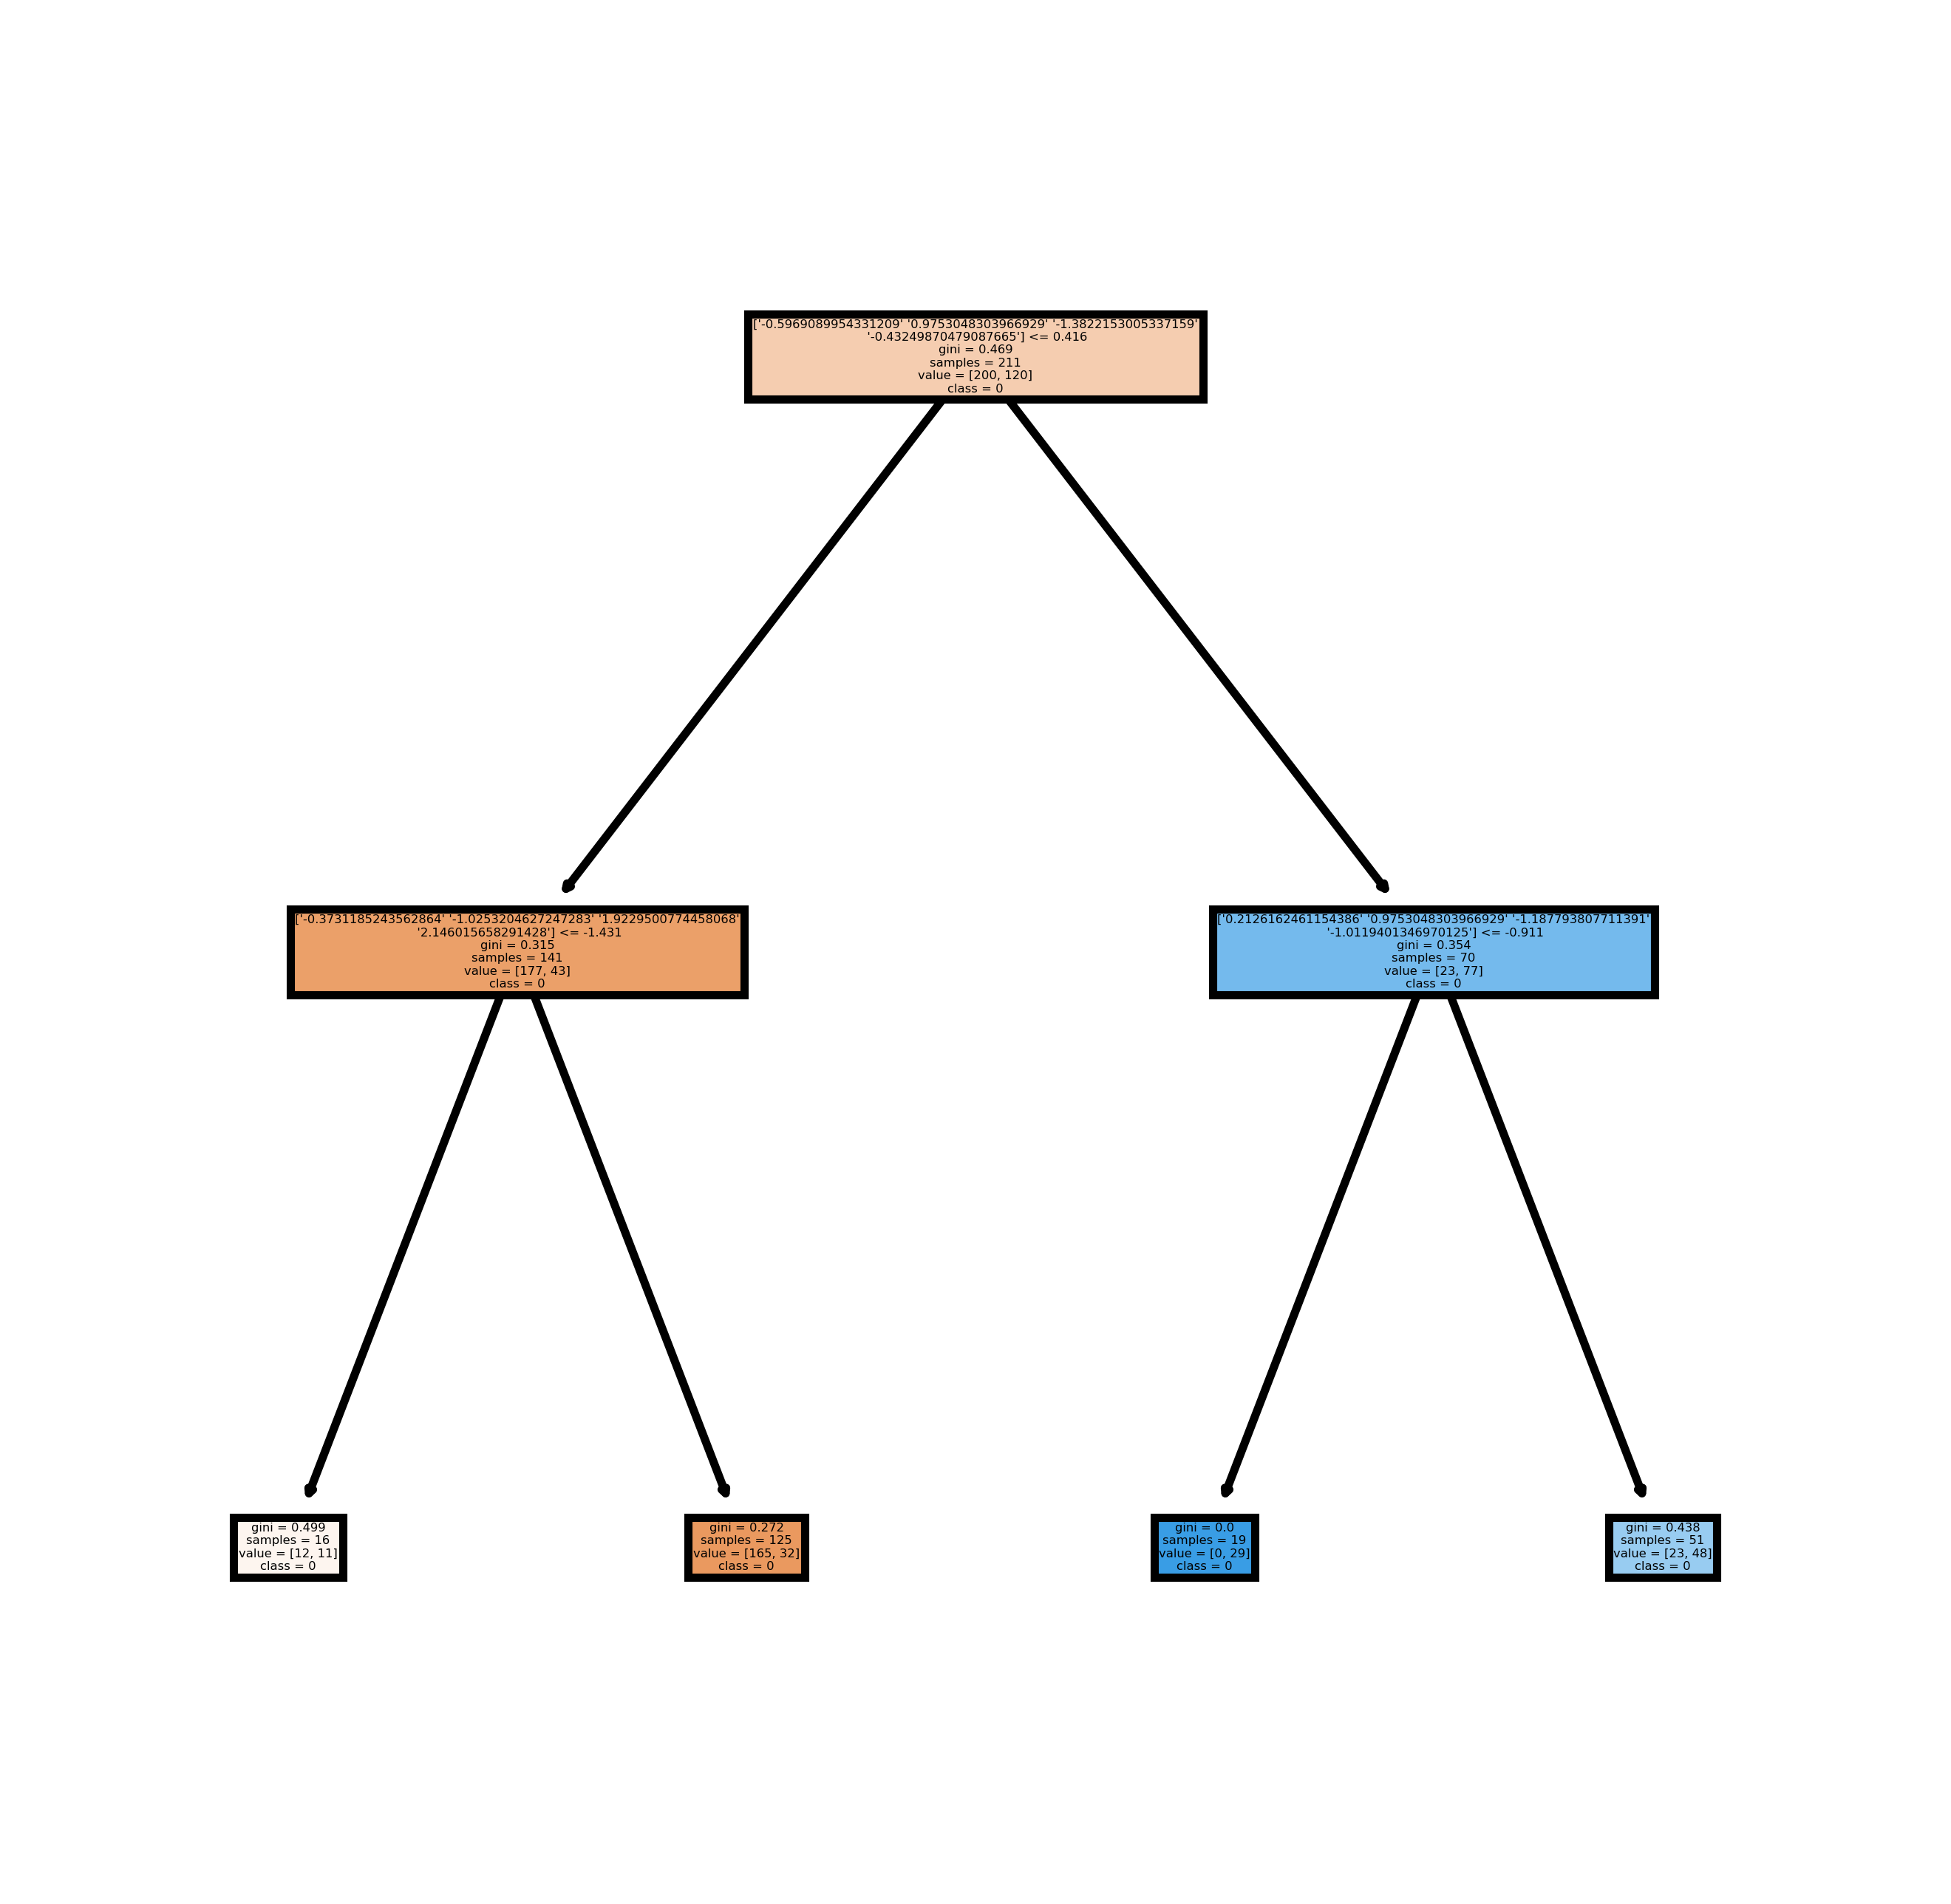

In [24]:
fn=feature_names
cn=target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

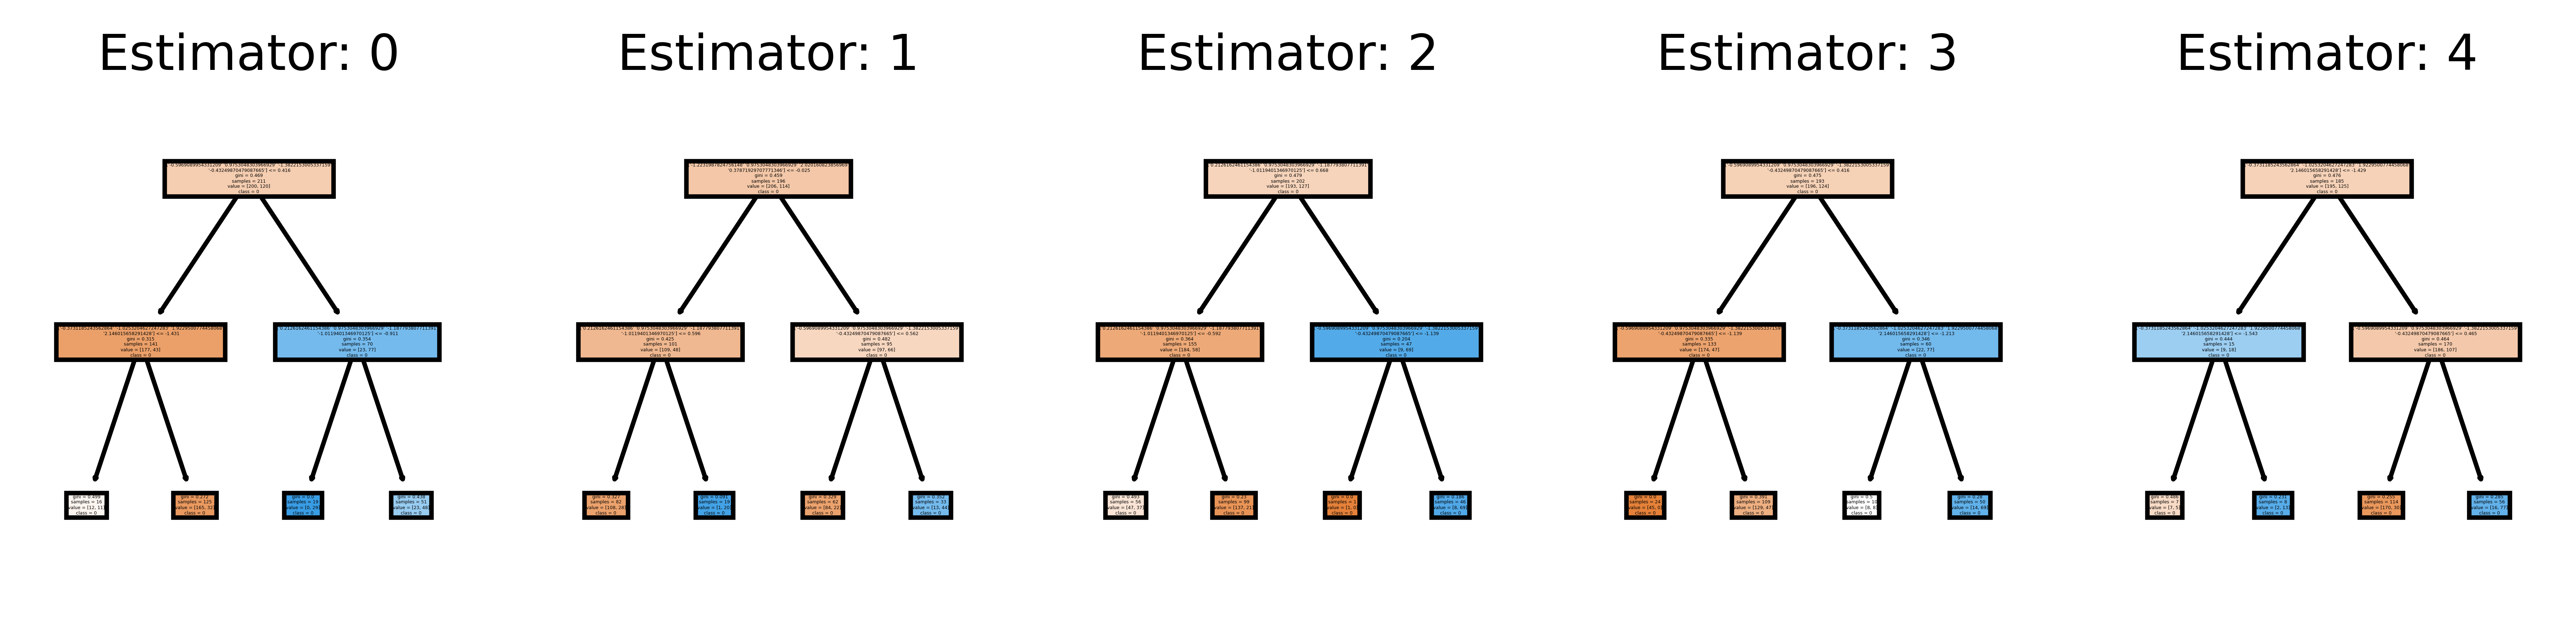

In [25]:
fn=feature_names
cn=target_names
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0,5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

**Visualising the Test set results**

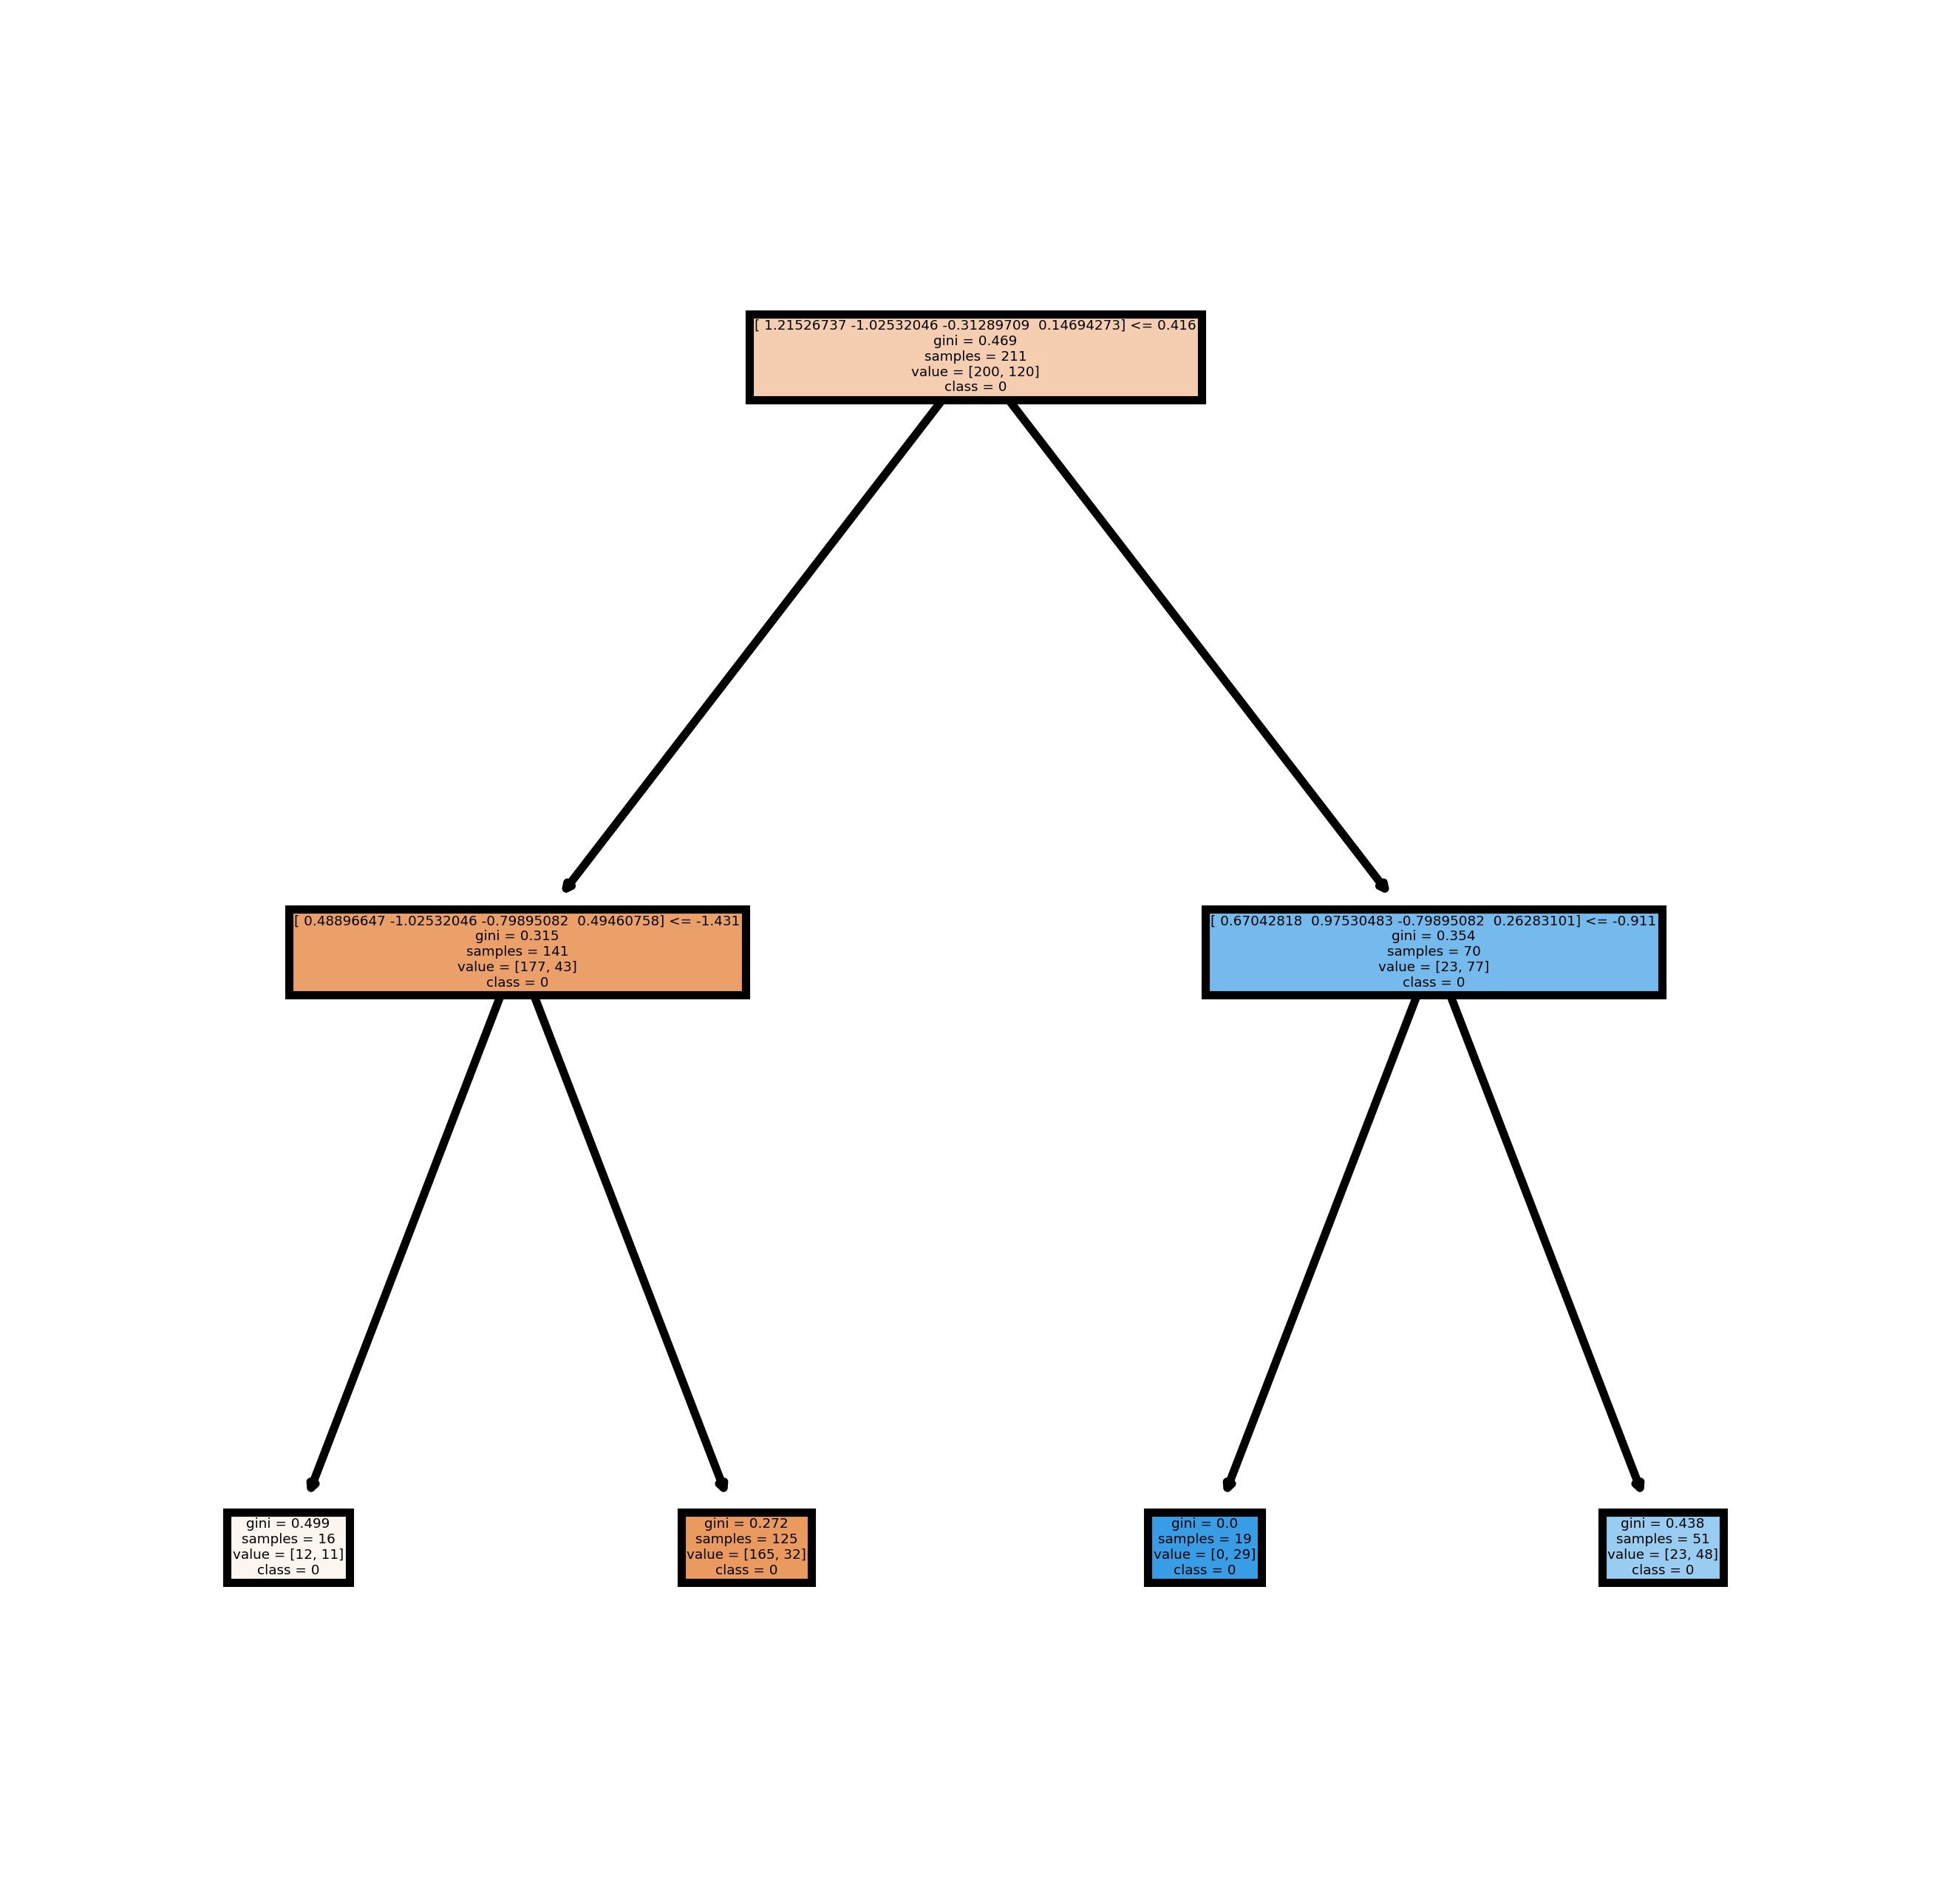

In [26]:
fn=feature_names_test
cn=target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

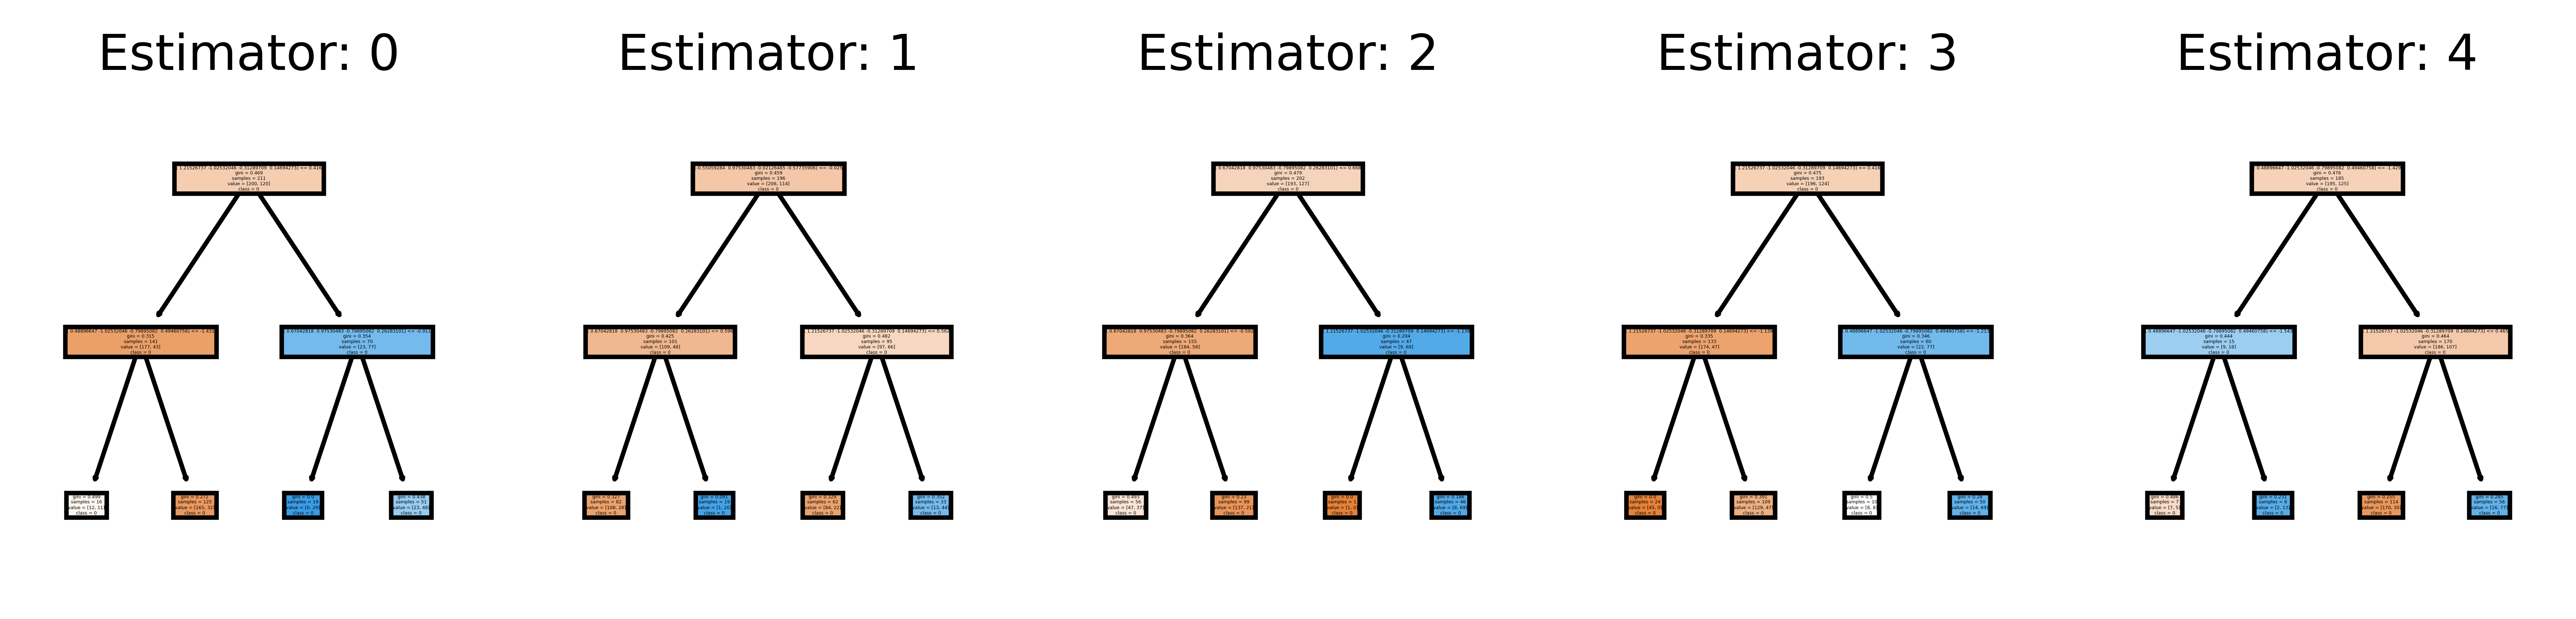

In [27]:
fn=feature_names_test
cn=target_names
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0,5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')